<a href="https://colab.research.google.com/github/sandy1990418/Deep_learning/blob/master/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##異常偵測Anomaly Detection 
異常偵測:類似於離群值的概念


1.常態分佈法:若資料點在兩個標準差外，可視為離群值

2.箱型圖:Q1+1.5(Q3-Q1)、Q3+1.5(Q3-Q1)

3.DBSCAN(分群演算法)

4.孤立森林(Isolation Forest)

Reference

https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [0]:
import numpy as np
import matplotlib.pyplot as plt

##Normal Distribution Method

In [6]:
#常態分佈法

##產生隨機亂數
data = np.random.randn(4000)  * 100 + 20
##空集合
anomalies = []
##Define function 
def Normal_method(data):
    ##算標準差
    data_std = np.std(data)
    ##算平均值
    data_mean = np.mean(data)
    ##算離群值標借
    abnormality = data_std * 2
    ##算下界
    lower  = data_mean - abnormality
    ##算上界
    upper = data_mean + abnormality
    ##如果數值大於(小於)上界(下界)則為離群值
    for outlier in data:
        if outlier > upper or outlier < lower:
            anomalies.append(outlier)
    return anomalies


Normal_method(data)

[237.9722672654917,
 279.27928233298206,
 249.0986049666704,
 238.88121810453532,
 -185.85669712335246,
 -209.91404687407854,
 230.795041253011,
 -235.3111136071462,
 -186.18399560840396,
 227.18305692014943,
 -215.05933883376565,
 -223.6764042563542,
 393.8696198257344,
 242.8757476292603,
 -234.49868319133557,
 287.1193280688309,
 -201.95670680542884,
 -310.17218851378345,
 -270.0243784266225,
 -186.17776314817013,
 -196.3422173869807,
 239.52014251056298,
 -222.2080770337282,
 -240.63400044363556,
 -222.25784970604258,
 -264.44837970564646,
 -225.83240857591417,
 267.2782222857643,
 224.1190157253097,
 248.4642069837363,
 -190.334703229847,
 -343.1828282222881,
 231.24769840691843,
 278.668522496013,
 220.27623714548528,
 271.7622824251156,
 -290.3510740770389,
 242.76297062380897,
 -184.612530940574,
 -194.2969916322351,
 237.63802139228255,
 252.91099931134082,
 -207.39234915283134,
 -182.16923823797165,
 236.1029457913445,
 -242.0002480266857,
 -201.8825475228112,
 237.4339336832

##Box plots Method

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


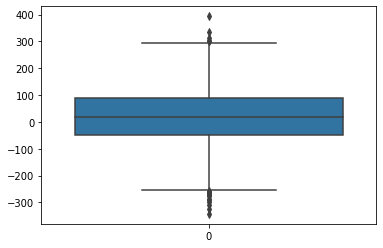

In [7]:
##箱型圖法
import seaborn as sns
import matplotlib.pyplot as plt

##畫出箱型圖
sns.boxplot(data=data)

##DBSCAN密度聚類演算法




In [14]:
from sklearn.cluster import DBSCAN
#dn表格每個維度
data = np.random.randn(4000,2)  * 100 + 20

##min_samples = The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
##eps = The maximum distance between two samples for one to be considered as in the neighborhood of the other
outlier= DBSCAN(min_samples = 5, eps = 4).fit_predict(data)
list(outlier).count(-1)

3009

##Isolation Forest

用於連續型資料的異常值檢測，其將異常定義為容易被孤立的點，意即在資料中，分布較為稀疏的部分，其發生的可能性很低，故較為稀疏部分的資料容易為異常值

In [18]:
from sklearn.ensemble import IsolationForest
import numpy as np
##產生亂數
data = np.random.randn(4000,2)  * 100 + 20
##使用套件
##contamination = 資料被汙染的數量，eg:離群值在資料集內的比例
## max_samples = 抓取多少樣本來訓練
Outlier= IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')
prediction = Outlier.fit_predict(data)
prediction 
'''
result 
-1 = 異常值
1 = 非異常值
'''

array([ 1, -1,  1, ...,  1, -1,  1])